In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df  = pd.read_excel('/content/Superstore.xlsx')

In [3]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2016-110422,2016-01-21,2016-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2019-121258,2019-02-26,2019-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2019-121258,2019-02-26,2019-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2019-121258,2019-02-26,2019-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9983 non-null   float64       
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City',
       'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

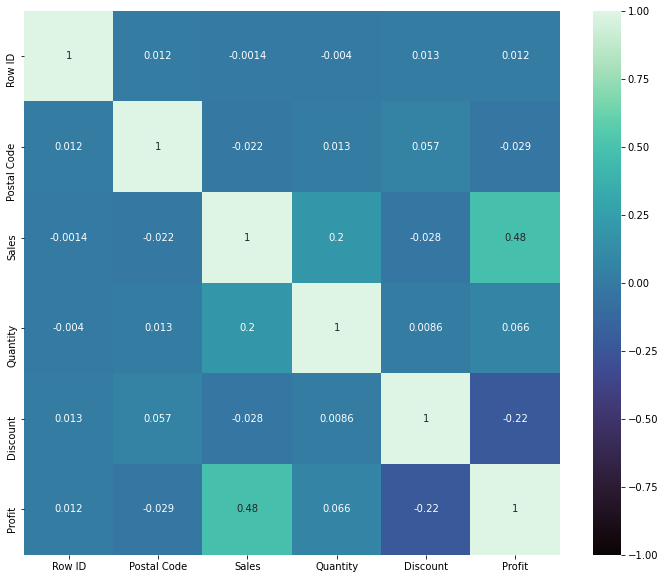

In [6]:
corr = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.show()

In [7]:
{column : len(df[column].unique()) for column in df.columns}

{'Category': 3,
 'City': 531,
 'Country/Region': 1,
 'Customer ID': 793,
 'Customer Name': 793,
 'Discount': 12,
 'Order Date': 1236,
 'Order ID': 5009,
 'Postal Code': 631,
 'Product ID': 1862,
 'Product Name': 1850,
 'Profit': 7545,
 'Quantity': 14,
 'Region': 4,
 'Row ID': 9994,
 'Sales': 6144,
 'Segment': 3,
 'Ship Date': 1334,
 'Ship Mode': 4,
 'State': 49,
 'Sub-Category': 17}

## drop unnecessary columns form the data

In [8]:
df = df.drop(['Row ID','Country/Region','Product Name','Customer Name'], axis=1)

## drop customer-oriented feature columns

In [9]:
df = df.drop(['Customer ID','Order ID'], axis=1)

In [10]:
pd.to_datetime(df['Order Date'])

0      2018-11-08
1      2018-11-08
2      2018-06-12
3      2017-10-11
4      2017-10-11
          ...    
9989   2016-01-21
9990   2019-02-26
9991   2019-02-26
9992   2019-02-26
9993   2019-05-04
Name: Order Date, Length: 9994, dtype: datetime64[ns]

In [11]:
def encode_dates(df,column):
  df[column] = pd.to_datetime(df[column])
  df[column  + '_year'] = df [column].apply(lambda x: x.year)
  df[column + '_month'] = df [column].apply(lambda x: x.month)
  df[column + '_day'] = df [column].apply(lambda x: x.day)
  return df

In [12]:
df = encode_dates(df, column= 'Order Date')
df = encode_dates(df, column= 'Ship Date')

In [13]:
df

,Order Date,Ship Date,Ship Mode,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,2018-11-08,2018-11-11,Second Class,Consumer,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,261.9600,2,0.00,41.9136,2018,11,8,2018,11,11
1,2018-11-08,2018-11-11,Second Class,Consumer,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,731.9400,3,0.00,219.5820,2018,11,8,2018,11,11
2,2018-06-12,2018-06-16,Second Class,Corporate,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,14.6200,2,0.00,6.8714,2018,6,12,2018,6,16
3,2017-10-11,2017-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,957.5775,5,0.45,-383.0310,2017,10,11,2017,10,18
4,2017-10-11,2017-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,22.3680,2,0.20,2.5164,2017,10,11,2017,10,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,2016-01-21,2016-01-23,Second Class,Consumer,Miami,Florida,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,25.2480,3,0.20,4.1028,2016,1,21,2016,1,23
9990,2019-02-26,2019-03-03,Standard Class,Consumer,Costa Mesa,California,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,91.9600,2,0.00,15.6332,2019,2,26,2019,3,3
9991,2019-02-26,2019-03-03,Standard Class,Consumer,Costa Mesa,California,92627.0,West,TEC-PH-10003645,Technology,Phones,258.5760,2,0.20,19.3932,2019,2,26,2019,3,3
9992,2019-02-26,2019-03-03,Standard Class,Consumer,Costa Mesa,California,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,29.6000,4,0.00,13.3200,2019,2,26,2019,3,3


In [14]:
df = df.drop(['Order Date','Ship Date'], axis=1)

In [15]:
df

,Ship Mode,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,Second Class,Consumer,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,261.9600,2,0.00,41.9136,2018,11,8,2018,11,11
1,Second Class,Consumer,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,731.9400,3,0.00,219.5820,2018,11,8,2018,11,11
2,Second Class,Corporate,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,14.6200,2,0.00,6.8714,2018,6,12,2018,6,16
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,957.5775,5,0.45,-383.0310,2017,10,11,2017,10,18
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,22.3680,2,0.20,2.5164,2017,10,11,2017,10,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,25.2480,3,0.20,4.1028,2016,1,21,2016,1,23
9990,Standard Class,Consumer,Costa Mesa,California,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,91.9600,2,0.00,15.6332,2019,2,26,2019,3,3
9991,Standard Class,Consumer,Costa Mesa,California,92627.0,West,TEC-PH-10003645,Technology,Phones,258.5760,2,0.20,19.3932,2019,2,26,2019,3,3
9992,Standard Class,Consumer,Costa Mesa,California,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,29.6000,4,0.00,13.3200,2019,2,26,2019,3,3


In [16]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

## one hot encoding 

In [17]:
pd.get_dummies(df['Ship Mode'], prefix = 'Ship Mode')


,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
9989,0,0,1,0
9990,0,0,0,1
9991,0,0,0,1
9992,0,0,0,1


In [18]:
def onehote_encode(df, column):
  dummies  =pd.get_dummies(df[column], prefix = column)
  df = pd.concat([df,dummies], axis=1)
  return df

## one hot encoding Categorical features

In [19]:
for column in ['Ship Mode','Segment','City','State','Postal Code','Region','Product ID','Category','Sub-Category']:
  df = onehote_encode(df, column=column)
  

In [20]:
df

,Ship Mode,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,City_Aberdeen,City_Abilene,City_Akron,City_Albuquerque,City_Alexandria,City_Allen,City_Allentown,City_Altoona,City_Amarillo,City_Anaheim,City_Andover,City_Ann Arbor,City_Antioch,City_Apopka,...,Product ID_TEC-PH-10004522,Product ID_TEC-PH-10004531,Product ID_TEC-PH-10004536,Product ID_TEC-PH-10004539,Product ID_TEC-PH-10004586,Product ID_TEC-PH-10004614,Product ID_TEC-PH-10004667,Product ID_TEC-PH-10004700,Product ID_TEC-PH-10004774,Product ID_TEC-PH-10004830,Product ID_TEC-PH-10004833,Product ID_TEC-PH-10004875,Product ID_TEC-PH-10004896,Product ID_TEC-PH-10004897,Product ID_TEC-PH-10004908,Product ID_TEC-PH-10004912,Product ID_TEC-PH-10004922,Product ID_TEC-PH-10004924,Product ID_TEC-PH-10004959,Product ID_TEC-PH-10004977,Category_Furniture,Category_Office Supplies,Category_Technology,Sub-Category_Accessories,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,Second Class,Consumer,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,261.9600,2,0.00,41.9136,2018,11,8,2018,11,11,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,Second Class,Consumer,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,731.9400,3,0.00,219.5820,2018,11,8,2018,11,11,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Second Class,Corporate,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,14.6200,2,0.00,6.8714,2018,6,12,2018,6,16,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,957.5775,5,0.45,-383.0310,2017,10,11,2017,10,18,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,22.3680,2,0.20,2.5164,2017,10,11,2017,10,18,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,25.2480,3,0.20,4.1028,2016,1,21,2016,1,23,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9990,Standard Class,Consumer,Costa Mesa,California,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,91.9600,2,0.00,15.6332,2019,2,26,2019,3,3,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9991,Standard Class,Consumer,Costa Mesa,California,92627.0,West,TEC-PH-10003645,Technology,Phones,258.5760,2,0.20,19.3932,2019,2,26,2019,3,3,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9992,Standard Class,C

In [21]:
df = df.drop(['Ship Mode','Segment','City','State','Postal Code','Region','Product ID','Category','Sub-Category'], axis=1)

In [22]:
df

,Sales,Quantity,Discount,Profit,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,City_Aberdeen,City_Abilene,City_Akron,City_Albuquerque,City_Alexandria,City_Allen,City_Allentown,City_Altoona,City_Amarillo,City_Anaheim,City_Andover,City_Ann Arbor,City_Antioch,City_Apopka,City_Apple Valley,City_Appleton,City_Arlington,City_Arlington Heights,City_Arvada,City_Asheville,City_Athens,City_Atlanta,City_Atlantic City,...,Product ID_TEC-PH-10004522,Product ID_TEC-PH-10004531,Product ID_TEC-PH-10004536,Product ID_TEC-PH-10004539,Product ID_TEC-PH-10004586,Product ID_TEC-PH-10004614,Product ID_TEC-PH-10004667,Product ID_TEC-PH-10004700,Product ID_TEC-PH-10004774,Product ID_TEC-PH-10004830,Product ID_TEC-PH-10004833,Product ID_TEC-PH-10004875,Product ID_TEC-PH-10004896,Product ID_TEC-PH-10004897,Product ID_TEC-PH-10004908,Product ID_TEC-PH-10004912,Product ID_TEC-PH-10004922,Product ID_TEC-PH-10004924,Product ID_TEC-PH-10004959,Product ID_TEC-PH-10004977,Category_Furniture,Category_Office Supplies,Category_Technology,Sub-Category_Accessories,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,261.9600,2,0.00,41.9136,2018,11,8,2018,11,11,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,731.9400,3,0.00,219.5820,2018,11,8,2018,11,11,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,14.6200,2,0.00,6.8714,2018,6,12,2018,6,16,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,957.5775,5,0.45,-383.0310,2017,10,11,2017,10,18,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,22.3680,2,0.20,2.5164,2017,10,11,2017,10,18,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,25.2480,3,0.20,4.1028,2016,1,21,2016,1,23,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9990,91.9600,2,0.00,15.6332,2019,2,26,2019,3,3,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9991,258.5760,2,0.20,19.3932,2019,2,26,2019,3,3,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9992,29.6000,4,0.00,13.3200,2019,2,26,2019,3,3,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## split data

In [23]:
Y= df['Profit']
X = df.drop('Profit',axis = 1)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.7, shuffle=True ,random_state=1)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(2998, 3112) (6996, 3112) (2998,) (6996,)


In [26]:
X_train

,Sales,Quantity,Discount,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,City_Aberdeen,City_Abilene,City_Akron,City_Albuquerque,City_Alexandria,City_Allen,City_Allentown,City_Altoona,City_Amarillo,City_Anaheim,City_Andover,City_Ann Arbor,City_Antioch,City_Apopka,City_Apple Valley,City_Appleton,City_Arlington,City_Arlington Heights,City_Arvada,City_Asheville,City_Athens,City_Atlanta,City_Atlantic City,City_Auburn,...,Product ID_TEC-PH-10004522,Product ID_TEC-PH-10004531,Product ID_TEC-PH-10004536,Product ID_TEC-PH-10004539,Product ID_TEC-PH-10004586,Product ID_TEC-PH-10004614,Product ID_TEC-PH-10004667,Product ID_TEC-PH-10004700,Product ID_TEC-PH-10004774,Product ID_TEC-PH-10004830,Product ID_TEC-PH-10004833,Product ID_TEC-PH-10004875,Product ID_TEC-PH-10004896,Product ID_TEC-PH-10004897,Product ID_TEC-PH-10004908,Product ID_TEC-PH-10004912,Product ID_TEC-PH-10004922,Product ID_TEC-PH-10004924,Product ID_TEC-PH-10004959,Product ID_TEC-PH-10004977,Category_Furniture,Category_Office Supplies,Category_Technology,Sub-Category_Accessories,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
3021,66.690,3,0.0,2017,11,8,2017,11,14,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2810,179.820,9,0.0,2017,11,16,2017,11,18,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5078,18.240,3,0.0,2019,11,11,2019,11,17,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1164,25.320,5,0.2,2016,3,3,2016,3,8,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1779,59.970,3,0.0,2018,11,11,2018,11,16,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,35.880,3,0.0,2019,10,23,2019,10,29,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7813,10.560,6,0.0,2018,2,14,2018,2,15,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
905,12.960,2,0.0,2018,4,8,2018,4,12,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5192,397.600,5,0.0,2016,11,28,2016,12,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [27]:
Y_train

3021    22.0077
2810    84.5154
5078     8.5728
1164     9.1785
1779    14.9925
         ...   
2895    10.0464
7813     4.6464
905      6.2208
5192    43.7360
235     -7.7247
Name: Profit, Length: 2998, dtype: float64

In [28]:
X_train.describe()

,Sales,Quantity,Discount,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,City_Aberdeen,City_Abilene,City_Akron,City_Albuquerque,City_Alexandria,City_Allen,City_Allentown,City_Altoona,City_Amarillo,City_Anaheim,City_Andover,City_Ann Arbor,City_Antioch,City_Apopka,City_Apple Valley,City_Appleton,City_Arlington,City_Arlington Heights,City_Arvada,City_Asheville,City_Athens,City_Atlanta,City_Atlantic City,City_Auburn,...,Product ID_TEC-PH-10004522,Product ID_TEC-PH-10004531,Product ID_TEC-PH-10004536,Product ID_TEC-PH-10004539,Product ID_TEC-PH-10004586,Product ID_TEC-PH-10004614,Product ID_TEC-PH-10004667,Product ID_TEC-PH-10004700,Product ID_TEC-PH-10004774,Product ID_TEC-PH-10004830,Product ID_TEC-PH-10004833,Product ID_TEC-PH-10004875,Product ID_TEC-PH-10004896,Product ID_TEC-PH-10004897,Product ID_TEC-PH-10004908,Product ID_TEC-PH-10004912,Product ID_TEC-PH-10004922,Product ID_TEC-PH-10004924,Product ID_TEC-PH-10004959,Product ID_TEC-PH-10004977,Category_Furniture,Category_Office Supplies,Category_Technology,Sub-Category_Accessories,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
count,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.0,2998.000000,2998.000000,2998.000000,2998.000000,2998.0,2998.000000,2998.000000,2998.0,2998.000000,2998.0,2998.000000,2998.000000,2998.000000,2998.000000,2998.0,2998.000000,...,2998.0,2998.000000,2998.0,2998.000000,2998.000000,2998.000000,2998.0,2998.0,2998.0,2998.0,2998.000000,2998.0,2998.000000,2998.000000,2998.000000,2998.0,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000
mean,222.680595,3.792195,0.155157,2017.712475,7.844897,15.527352,2017.728486,7.767512,15.950300,0.164777,0.055704,0.194463,0.585057,0.513009,0.303202,0.183789,0.000334,0.000334,0.002335,0.001001,0.001334,0.000667,0.001001,0.0,0.001001,0.003002,0.001001,0.000334,0.0,0.000667,0.000334,0.0,0.007672,0.0,0.000667,0.000334,0.000334,0.005003,0.0,0.003002,...,0.0,0.000667,0.0,0.001001,0.001001,0.001001,0.0,0.0,0.0,0.0,0.000334,0.0,0.001001,0.001001,0.000667,0.0,0.000667,0.000334,0.000334,0.000667,0.212141,0.600400,0.187458,0.076051,0.043362,0.076051,0.146431,0.027685,0.057705,0.005003,0.024683,0.023015,0.098399,0.034690,0.012008,0.144430,0.094396,0.087392,0.020347,0.028352
std,631.528298,2.178055,0.205948,1.120107,3.276028,8.753116,1.116053,3.335783,8.865276,0.371041,0.229387,0.395853,0.492794,0.499914,0.459718,0.387377,0.018264,0.018264,0.048272,0.031623,0.036509,0.025824,0.031623,0.0,0.031623,0.054717,0.031623,0.018264,0.0,0.025824,0.018264,0.0,0.087267,0.0,0.025824,0.018264,0.018264,0.070569,0.0,0.054717,...,0.0,0.025824,0.0,0.031623,0.031623,0.031623,0.0,0.0,0.0,0.0,0.018264,0.0,0.031623,0.031623,0.025824,0.0,0.025824,0.018264,0.018264,0.025824,0.408893,0.489898,0.390344,0.265123,0.203705,0.265123,0.353597,0.164096,0.233224,0.070569,0.155183,0.149977,0.297903,0.183023,0.108939,0.351583,0.292428,0.282455,0.141207,0.166005
min,0.444000,1.000000,0.000000,2016.000000,1.000000,1.000000,2016.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [29]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train),columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X.columns)

In [30]:
X_train

,Sales,Quantity,Discount,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,City_Aberdeen,City_Abilene,City_Akron,City_Albuquerque,City_Alexandria,City_Allen,City_Allentown,City_Altoona,City_Amarillo,City_Anaheim,City_Andover,City_Ann Arbor,City_Antioch,City_Apopka,City_Apple Valley,City_Appleton,City_Arlington,City_Arlington Heights,City_Arvada,City_Asheville,City_Athens,City_Atlanta,City_Atlantic City,City_Auburn,...,Product ID_TEC-PH-10004522,Product ID_TEC-PH-10004531,Product ID_TEC-PH-10004536,Product ID_TEC-PH-10004539,Product ID_TEC-PH-10004586,Product ID_TEC-PH-10004614,Product ID_TEC-PH-10004667,Product ID_TEC-PH-10004700,Product ID_TEC-PH-10004774,Product ID_TEC-PH-10004830,Product ID_TEC-PH-10004833,Product ID_TEC-PH-10004875,Product ID_TEC-PH-10004896,Product ID_TEC-PH-10004897,Product ID_TEC-PH-10004908,Product ID_TEC-PH-10004912,Product ID_TEC-PH-10004922,Product ID_TEC-PH-10004924,Product ID_TEC-PH-10004959,Product ID_TEC-PH-10004977,Category_Furniture,Category_Office Supplies,Category_Technology,Sub-Category_Accessories,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,-0.247046,-0.363777,-0.753504,-0.636184,0.963249,-0.860106,-0.652843,0.969196,-0.220030,-0.444167,-0.242878,-0.491333,0.842162,0.974312,-0.659649,-0.474525,-0.018267,-0.018267,-0.048377,-0.031649,-0.036551,-0.025837,-0.031649,0.0,-0.031649,-0.054873,-0.031649,-0.018267,0.0,-0.025837,-0.018267,0.0,-0.087927,0.0,-0.025837,-0.018267,-0.018267,-0.070912,0.0,-0.054873,...,0.0,-0.025837,0.0,-0.031649,-0.031649,-0.031649,0.0,0.0,0.0,0.0,-0.018267,0.0,-0.031649,-0.031649,-0.025837,0.0,-0.025837,-0.018267,-0.018267,-0.025837,1.927132,-1.225767,-0.480319,-0.286898,-0.212903,-0.286898,-0.414188,-0.168741,-0.247465,-0.070912,-0.159084,-0.153485,3.026997,-0.189569,-0.110245,-0.410866,-0.322856,-0.309452,-0.144116,-0.17082
1,-0.067879,2.391434,-0.753504,-0.636184,0.963249,0.054007,-0.652843,0.969196,0.231244,-0.444167,-0.242878,2.035281,-1.187421,-1.026365,-0.659649,2.107372,-0.018267,-0.018267,-0.048377,-0.031649,-0.036551,-0.025837,-0.031649,0.0,-0.031649,-0.054873,-0.031649,-0.018267,0.0,-0.025837,-0.018267,0.0,-0.087927,0.0,-0.025837,-0.018267,-0.018267,-0.070912,0.0,-0.054873,...,0.0,-0.025837,0.0,-0.031649,-0.031649,-0.031649,0.0,0.0,0.0,0.0,-0.018267,0.0,-0.031649,-0.031649,-0.025837,0.0,-0.025837,-0.018267,-0.018267,-0.025837,-0.518906,0.815816,-0.480319,-0.286898,-0.212903,-0.286898,-0.414188,-0.168741,-0.247465,-0.070912,-0.159084,-0.153485,-0.330360,-0.189569,-0.110245,2.433883,-0.322856,-0.309452,-0.144116,-0.17082
2,-0.323778,-0.363777,-0.753504,1.149658,0.963249,-0.517314,1.139486,0.969196,0.118426,-0.444167,-0.242878,-0.491333,0.842162,-1.026365,-0.659649,2.107372,-0.018267,-0.018267,-0.048377,-0.031649,-0.036551,-0.025837,-0.031649,0.0,-0.031649,-0.054873,-0.031649,-0.018267,0.0,-0.025837,-0.018267,0.0,-0.087927,0.0,-0.025837,-0.018267,-0.018267,-0.070912,0.0,-0.054873,...,0.0,-0.025837,0.0,-0.031649,-0.031649,-0.031649,0.0,0.0,0.0,0.0,-0.018267,0.0,-0.031649,-0.031649,-0.025837,0.0,-0.025837,-0.018267,-0.018267,-0.025837,-0.518906,0.815816,-0.480319,-0.286898,-0.212903,-0.286898,2.414365,-0.168741,-0.247465,-0.070912,-0.159084,-0.153485,-0.330360,-0.189569,-0.110245,-0.410866,-0.322856,-0.309452,-0.144116,-0.17082
3,-0.312565,0.554626,0.217777,-1.529105,-1.479140,-1.431426,-1.549007,-1.429442,-0.896941,-0.444167,-0.242878,-0.491333,0.842162,-1.026365,-0.659649,2.107372,-0.018267,-0.018267,-0.048377,-0.031649,-0.036551,-0.025837,-0.031649,0.0,-0.031649,-0.054873,-0.031649,-0

## training 

In [31]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [32]:
# determine the number of input features
n_features = X_train.shape[1]

In [33]:
# define model
model1 = Sequential()
# Add first Hiddent layer and define input layer using input shape parameter
model1.add(Dense(120, activation='relu', input_shape=(n_features,)))
model1.add(Dense(120, activation='relu'))
model1.add(Dense(100, activation='relu'))
model1.add(Dense(1, activation='linear'))


In [34]:
# compile the model
# loss = mse (mean squared error ) for regression output
model1.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [35]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 120)               373560    
_________________________________________________________________
dense_1 (Dense)              (None, 120)               14520     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               12100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 400,281
Trainable params: 400,281
Non-trainable params: 0
_________________________________________________________________


In [36]:
# fit the model (traning)
history = model1.fit( X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1,shuffle=False)

Epoch 1/100
75/75 [==============================] - 1s 7ms/step - loss: 32555.5000 - mse: 32555.5000 - val_loss: 32560.5996 - val_mse: 32560.5996
Epoch 2/100
75/75 [==============================] - 0s 4ms/step - loss: 30196.4805 - mse: 30196.4805 - val_loss: 30532.7305 - val_mse: 30532.7305
Epoch 3/100
75/75 [==============================] - 0s 4ms/step - loss: 25865.0801 - mse: 25865.0801 - val_loss: 36733.4609 - val_mse: 36733.4609
Epoch 4/100
75/75 [==============================] - 0s 4ms/step - loss: 22118.6680 - mse: 22118.6680 - val_loss: 52186.6250 - val_mse: 52186.6250
Epoch 5/100
75/75 [==============================] - 0s 3ms/step - loss: 18923.6738 - mse: 18923.6738 - val_loss: 62150.4219 - val_mse: 62150.4219
Epoch 6/100
75/75 [==============================] - 0s 4ms/step - loss: 14497.1230 - mse: 14497.1230 - val_loss: 99716.5859 - val_mse: 99716.5859
Epoch 7/100
75/75 [==============================] - 0s 4ms/step - loss: 9162.0107 - mse: 9162.0107 - val_loss: 119394

In [37]:
loss, mse = model1.evaluate(X_test, Y_test, verbose=0)
loss,mse

(121685.625, 121685.625)

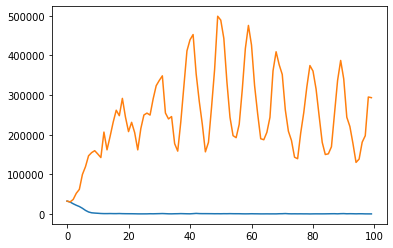

In [38]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [39]:
# evaluate the model
loss, acc = model1.evaluate(X_test, Y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 121685.625


In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
reg = LinearRegression().fit(X_train, Y_train)

In [42]:
reg.coef_, reg.intercept_

(array([ 2.17617416e+02, -2.63425334e+01, -4.65189260e+01, ...,
         4.31733017e+14,  2.72847995e+14, -5.44127116e+14]),
 23.936459933323228)

In [43]:
Y_pred = reg.predict(X_test)

In [44]:
(sum((Y_pred - Y_test)**2)/len(Y_test))**0.5 # RMSE

1.4051287515456054e+16

In [45]:
res = pd.DataFrame([Y_pred,Y_test])
res = res.T
res.columns = ['Y_pred','Y_test']

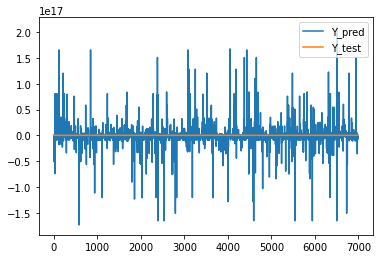

In [46]:
res[['Y_pred', 'Y_test']].plot()

In [47]:
print("Linear Regression R^2 Score:", reg.score(X_test, Y_test))

Linear Regression R^2 Score: -3.0684387317696995e+27
